# World Ocean Atlas sandbox.

playing with Ryan Abernathy's very nice examples in: https://github.com/rabernat/intro_to_physical_oceanography

accessing the World Ocean Atlas from NOAA: https://www.nodc.noaa.gov/OC5/woa18/

Using thredds, eg:  https://data.nodc.noaa.gov/thredds/catalog/ncei/woa/temperature/decav/1.00/catalog.html


In [1]:
import xarray as xr
import matplotlib.pyplot as plt

%matplotlib inline

/Users/beaird/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/beaird/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [10]:
# data
# url_base = 'http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NODC/.WOA09/.Grid-1x1/.Annual'
# url_temp = url_base + '/.temperature/.t_an/dods'
# url_salt = url_base + '/.salinity/.s_an/dods '
# woa_temp = xr.open_dataset(url_temp)
# woa_temp_nobs = xr.open_dataarray(url_base + '/.temperature/.t_dd/dods')
# woa_salt = xr.open_dataset(url_salt)
# woa = xr.merge([woa_temp, woa_salt, woa_temp_nobs]).isel(time=0)

woa = xr.open_dataset('https://data.nodc.noaa.gov/thredds/dodsC/ncei/woa/temperature/decav/1.00/woa18_decav_t00_01.nc', decode_times=False)

woa

<xarray.Dataset>
Dimensions:             (depth: 102, lat: 180, lon: 360, nbounds: 2, time: 1)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * depth               (depth) float32 0.0 5.0 10.0 ... 5300.0 5400.0 5500.0
  * time                (time) float32 4326.0
Dimensions without coordinates: nbounds
Data variables:
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    t_an                (time, depth, lat, lon) float32 ...
    t_mn                (time, depth, lat, lon) float32 ...
    t_dd                (time, depth, lat, lon) float64 ...
    t_sd                (time, depth, lat, lon) float32 ...
    t_se                (time, depth, lat, lon) float32 ...
    t_oa 

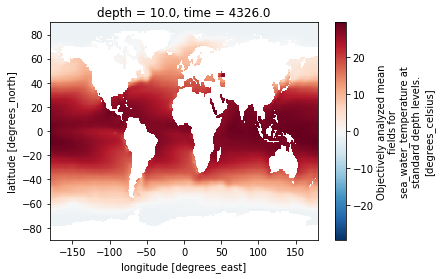

In [8]:
woa.t_an.sel(depth=10.0).plot()

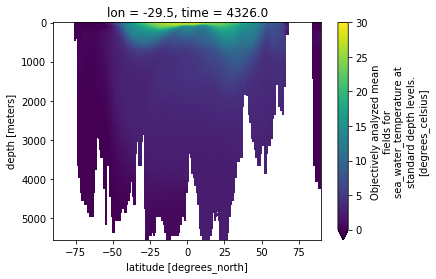

In [16]:
woa.t_an.sel(lon=-30, method='nearest').plot(yincrease=False, vmin=0, vmax=30)